In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('../input/digit-recognizer/train.csv')
df1 = pd.read_csv('../input/digit-recognizer/test.csv')

Split the training data by features and labels

In [ ]:
x_train = df.drop('label', axis = 1)
y_train = df['label']

test = df1

Check the shape of training and test data

In [ ]:
x_train.shape

In [ ]:
test.shape

**Reshaping our data into a 28x28 matrix**

In [ ]:
x_train = x_train.values.reshape(42000, 28,28)
test = test.values.reshape(28000, 28, 28)

In [ ]:
x_train.shape

In [ ]:
test.shape

displaying the matrix of a single image, [0] defines the first instance of the data

In [ ]:
single_image = x_train[0]

In [ ]:
single_image

In [ ]:
#matplotlib has a method to show these values in image format
plt.imshow(single_image)

this looks like a **'1'**, and since greyscale values varies from 0 to 255, we can see values close to 255 in the matrix above

In [ ]:
#exploring labels
y_train

Here we stand correct, the first value is 1, as shown in the image above


The values here represent labels, what we want is categories, so we have to use one-hot-encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
#checking the shape of y_train
y_train.shape

Here, y_train's dataset of 42000 represents labels, what we want is each of these labels to represent a category,so we'll use to_categorical method

In [ ]:
y_example = to_categorical(y_train)

In [ ]:
y_example.shape

we can see that to_categorical converted a class vector into a binary class matrix

In [ ]:
y_example[0]

In [ ]:
y_cat_train = to_categorical(y_train, num_classes=10)
#to_categorical takes num_classes on its own based on the label's unique values
#here it was from 0 to 9, hence, it took 10. You can specify them too using num_classes

In [ ]:
y_cat_train[0]

Notice here, the first value of label was 1, so to_categorical() has transformed that into an entire row

**Now we are going to normalize our data**

In [ ]:
#checking the maximum value of single_image
single_image.max()

In [ ]:
#checking the minimum value of single_image
single_image.min()

# we're gonna scale them between 0 and 1

In [ ]:
x_train = x_train/255
test = test/255

In [ ]:
#checking the scaled image
scaled_image = x_train[0]

In [ ]:
scaled_image

In [ ]:
scaled_image.max()

In [ ]:
plt.imshow(scaled_image)

# Now we're gonna reshape our image to let the model know that we're dealing with a greyscale image, hence 1 color channel

In [ ]:
x_train.shape

In [ ]:
#batch_size, width, height, color channels
x_train = x_train.reshape(42000, 28, 28, 1)

In [ ]:
test.shape

In [ ]:
test = test.reshape(28000, 28, 28, 3)

# Now we're going to train our model. Let's import some libraries.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# Now we're gonna take 10% data from the training data and use it for data validation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(#rescale = 1./255,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rotation_range = 20,
                               shear_range = 0.3,
                               zoom_range = 0.3,
                               horizontal_flip = True)
generator.fit(x_train)


In [ ]:
random_seed = 2

x_train, x_val, y_cat_train, y_val = train_test_split(x_train, y_cat_train, test_size = 0.1, random_state=random_seed)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(4,4), strides = (1,1), input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()) #flatten our layer, eg, our image is 28x28 so the flattened image will be 28*28=784 pixels
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))

#OUTPUT layer
model.add(Dense(10, activation='softmax')) #choosing softmax because of 'multiclass classification'


model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [ ]:
model.summary()

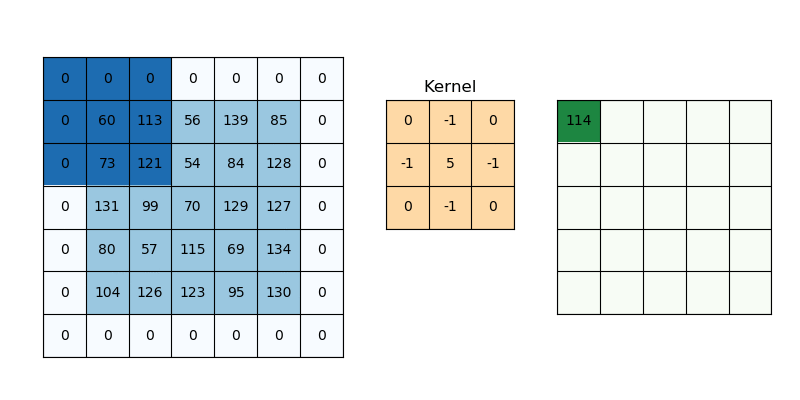

# filters:- how many filters to apply on an image
# kernel_size:- size of the matrix which strides through the whole image 
# stride:- (x,y) steps while moving the kernel 
# padding:- Padding is the extra layer we add to the corner of the image to prevent shrinkage and loss of info, such as add a padding of 0 on the outside of the image matrix, so that the corner matrix is also covered more than once while striding

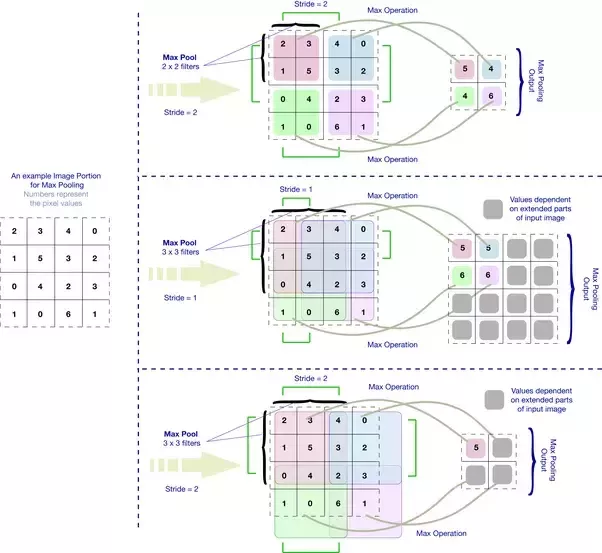

In [ ]:
#Gonna import EarlyStopping in order to avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [ ]:
#Fitting the model
model.fit(x_train, y_cat_train, epochs = 10, validation_data = (x_val, y_val), callbacks = [early_stop])

Checking the metrics now.

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

In [ ]:
#Plotting loss and val_loss together
metrics[['loss', 'val_loss']].plot()

In [ ]:
#Plotting accuracy and val_accuracy together
metrics[['accuracy', 'val_accuracy']].plot()

# Both of them look pretty good

In [ ]:
#Evaluating validation loss and accuracy
model.evaluate(x_val, y_val, verbose = 0)

# Now we'll get Classification Report and Confusion Matrix. 
# A Classification report is used to measure the quality of predictions from a classification algorithm and a Confusion Matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict(x_val)

# Convert predictions classes to one hot vectors 
predictions_classes = np.argmax(predictions, axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_val, axis = 1)

In [ ]:
predictions

In [ ]:
#we'll use y_true for predictions
print(classification_report(y_true, predictions_classes))

In [ ]:
print(confusion_matrix(y_true, predictions_classes))

In [ ]:
#visualizing confusion matrix
import seaborn as sns

plt.figure(figsize = (12, 8))
sns.heatmap(confusion_matrix(y_true, predictions_classes), annot=True)

In [ ]:

# from keras.applications import MobileNetV2
# from keras.models import load_model

In [ ]:
# model  = load_model("/kaggle/input/common-keras-pretrained-models/ResNet50.h5")
# for i in range(len(model.layers)-1):
#     model.layers[i].trainable = False
# model.summary()

In [ ]:
# model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [ ]:
# model.fit(x_train, y_cat_train, epochs = 10, validation_data = (x_val, y_val), callbacks = [early_stop])